# Task 2
Analyzing best selling books

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Loading data

In [2]:
df = pd.read_csv("C:/Users/NIKITA/bestsellers with categories.csv")
df.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


# Exploratory Data analysis

In [3]:
print("Shape of data: ",df.shape)

Shape of data:  (550, 7)


In [4]:
# Checking missing values
df.isnull().sum()

Name           0
Author         0
User Rating    0
Reviews        0
Price          0
Year           0
Genre          0
dtype: int64

In [5]:
# Checking unique values
df.nunique()

Name           351
Author         248
User Rating     14
Reviews        346
Price           40
Year            11
Genre            2
dtype: int64

In [6]:
# Basic information of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         550 non-null    object 
 1   Author       550 non-null    object 
 2   User Rating  550 non-null    float64
 3   Reviews      550 non-null    int64  
 4   Price        550 non-null    int64  
 5   Year         550 non-null    int64  
 6   Genre        550 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 30.2+ KB


# Data visualization

In [7]:
# Correlation of dataset
corr = df.corr()


<AxesSubplot:>

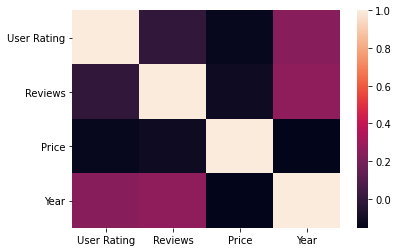

In [8]:
# Heatmap
fig = plt.gcf()
sns.heatmap(corr)

Text(0.5, 1.0, 'Plot of User rating per year')

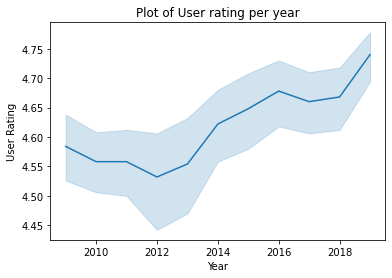

In [9]:
fig = plt.gcf()
sns.lineplot(x='Year',y='User Rating',data=df)
plt.title("Plot of User rating per year")

Text(0.5, 1.0, 'Plot of reviews')

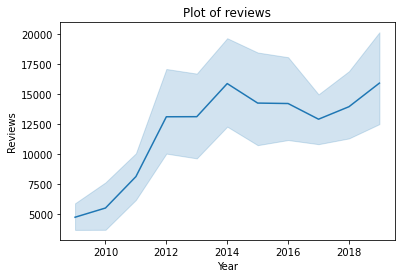

In [10]:
# Plot of reviews 
sns.lineplot(x='Year',y='Reviews',data=df)
plt.title("Plot of reviews")

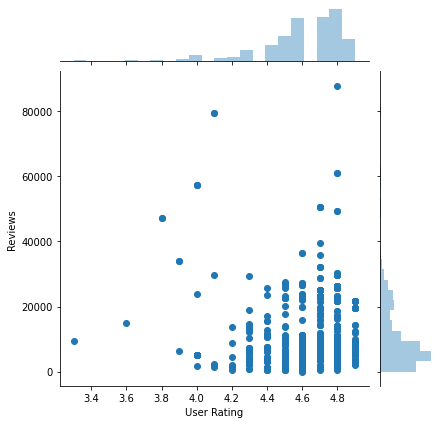

In [12]:
# Visualize  a bivariate distribution between rating and number of reviews
sns.jointplot(x='User Rating', y= 'Reviews', data=df)

Text(0.5, 1.0, 'Histogram of User Rating')

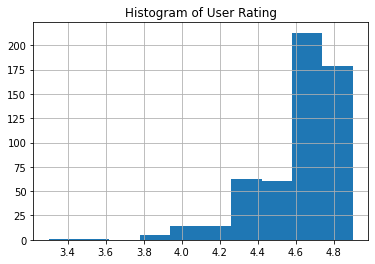

In [13]:
# Histogram of User Rating
df.hist('User Rating')
plt.title("Histogram of User Rating")

In [14]:
#Top 10 author who got best sellers
author= df['Author'].value_counts().head(10)

Text(0.5, 1.0, 'Top 10 author who got best selling books')

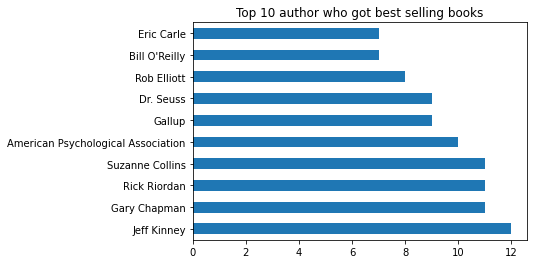

In [15]:
author.plot(kind='barh')
plt.title("Top 10 author who got best selling books")

From above,Jeff Kinney whose books are mostly sold.

In [16]:
senti= df["User Rating"] >=4 
senti.replace([True,False] , ["pos","neg"])

0      pos
1      pos
2      pos
3      pos
4      pos
      ... 
545    pos
546    pos
547    pos
548    pos
549    pos
Name: User Rating, Length: 550, dtype: object

<AxesSubplot:>

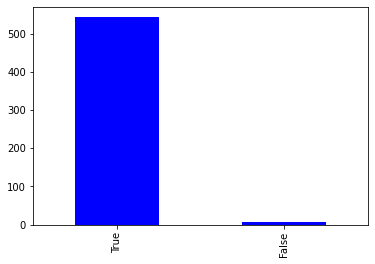

In [17]:
senti.value_counts().plot.bar(color='blue')

<AxesSubplot:ylabel='Genre'>

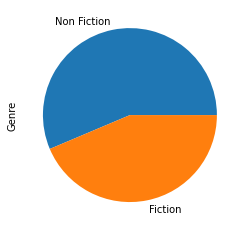

In [18]:
df['Genre'].value_counts().plot(kind='pie')

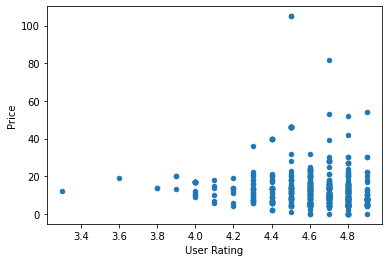

In [19]:
df.plot(x='User Rating', y='Price', kind='scatter')
plt.show()

In [20]:
genre_mapping = {'Non Fiction': 0, 'Fiction': 1}
df['Genre'] = df['Genre'].replace(genre_mapping)

Top 10 highest Rated books

In [21]:
# Most Reviewed books
df.groupby(['Author','Name', 'Genre'],as_index=False)[['User Rating', 'Reviews']].mean().sort_values('Reviews', ascending=False).head(10)

,Author,Name,Genre,User Rating,Reviews
87,Delia Owens,Where the Crawdads Sing,1,4.8,87841.0
243,Paula Hawkins,The Girl on the Train,1,4.1,79446.0
231,Michelle Obama,Becoming,0,4.8,61133.0
128,Gillian Flynn,Gone Girl,1,4.0,57271.0
182,John Green,The Fault in Our Stars,1,4.7,50482.0
200,Kristin Hannah,The Nightingale: A Novel,1,4.8,49288.0
100,E L James,Fifty Shades of Grey: Book One of the Fifty Sh...,1,3.8,47265.0
15,Andy Weir,The Martian,1,4.7,39459.0
21,Anthony Doerr,All the Light We Cannot See,1,4.6,36348.0
245,Paulo Coelho,The Alchemist,1,4.7,35799.0


Text(0.5, 0, 'No. of Publications')

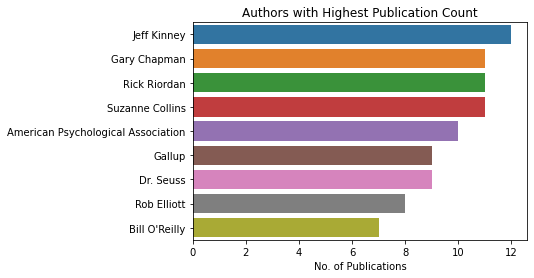

In [22]:
# authors with highest publications
top_authors = df['Author'].value_counts().head(9)
sns.barplot(top_authors, top_authors.index)
plt.title('Authors with Highest Publication Count')
plt.xlabel('No. of Publications')

# Linear Regression

In [23]:
# Import required libraries
from sklearn import metrics
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [24]:
# Encode Name column
le = preprocessing.LabelEncoder()
df['Name'] = le.fit_transform(df['Name'])

In [25]:
# Encode authors column
df['Author'] = le.fit_transform(df['Author'])

In [26]:
# Divide the data into attributes and labels
X = df.drop(['User Rating','Genre'], axis = 1)
y = df['User Rating']

In [27]:
# Split 80% of the data to the training set and 20% of the data to test set 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 10)

In [28]:
# Create and fit model
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [29]:
predictions = lr.predict(X_test)

In [30]:
pred = pd.DataFrame({'Actual': y_test.tolist(), 'Predicted': predictions.tolist()}).head(25)
pred.head(10)

,Actual,Predicted
0,4.2,4.505719
1,4.8,4.640655
2,4.8,4.686993
3,4.7,4.548376
4,4.8,4.466613
5,4.8,4.708539
6,4.5,4.567209
7,4.8,4.608800
8,4.8,4.693160
9,4.6,4.718209


<AxesSubplot:>

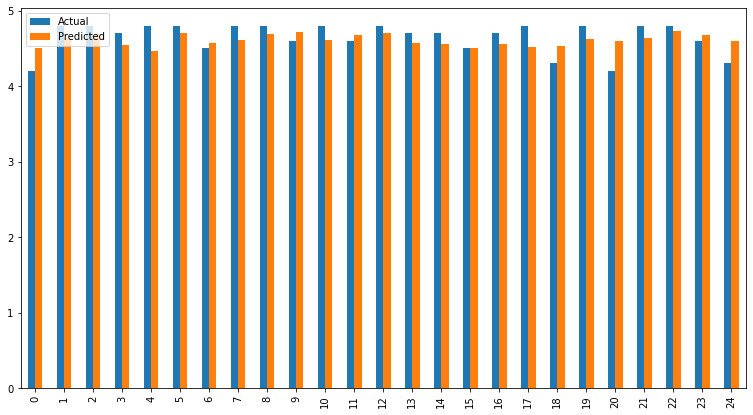

In [31]:
# visualise the above comparison result
pred.plot(kind='bar', figsize=(13, 7))

In [32]:
# Evaluate the performance of the algorithm
print('MAE:', metrics.mean_absolute_error(y_test, predictions))

MAE: 0.16207025251936888


In [ ]:
Thank you.